<img src="spotify-logo_1.jpg" alt="Image" width="1000">

### About the data

This data is about Spotify tracks, including their popularity, genres, and other attributes. We will analyze the relationships, correlations, and distributions of the attributes related to music tracks, providing detailed information about each track's characteristics and metadata. Additionally, we will create a simple machine learning model to recommend tracks based on a song that we input.

### Column Description

- **artists**: The artists' names who performed the track. If there is more than one artist, they are separated by a `;`.
- **album_name**: The album name in which the track appears.
- **popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by an algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms**: The track length in milliseconds.
- **explicit**: Whether or not the track has explicit lyrics (`True` = yes it does; `False` = no it does not OR unknown).
- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- **loudness**: The overall loudness of a track in decibels (dB).
- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor by 0.
- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater the likelihood the track contains no vocal content.
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre**: The genre to which the track belongs.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')

df = df[['artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre']]

df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
df[df['artists'].isnull() == True]
df= df.dropna(subset=['artists'])
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Distributions

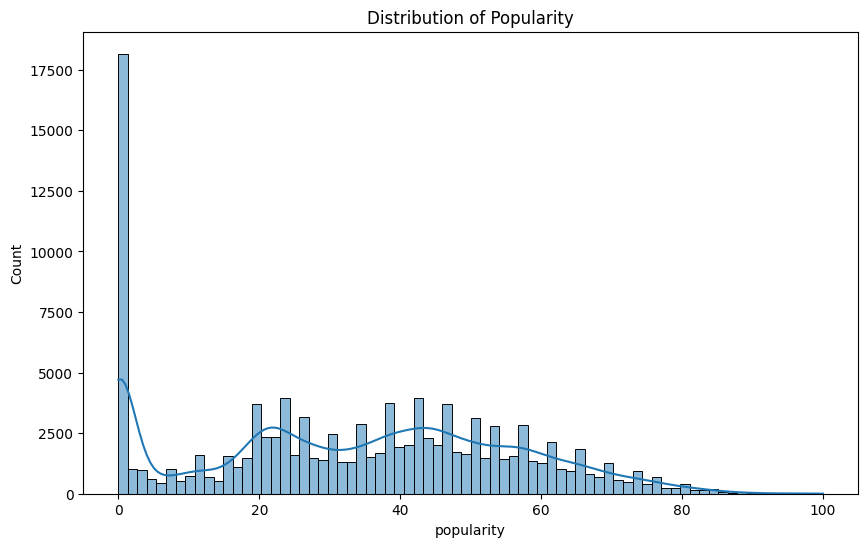

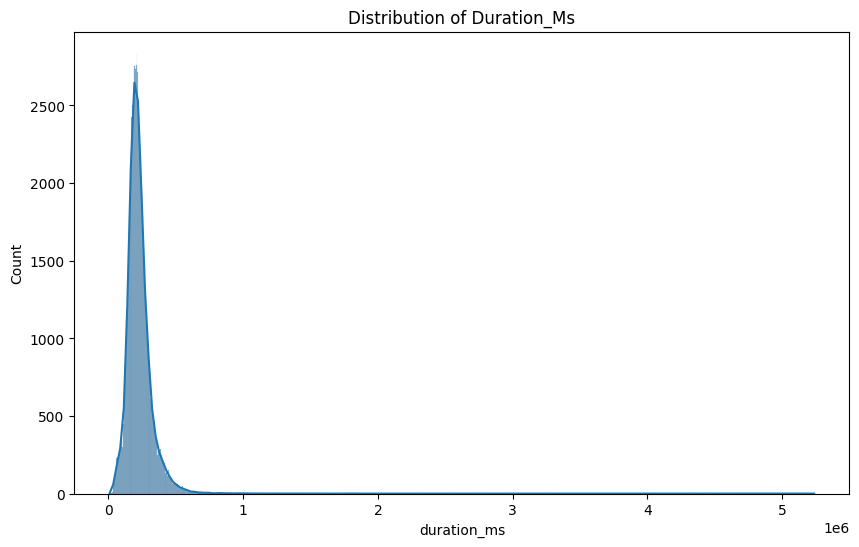

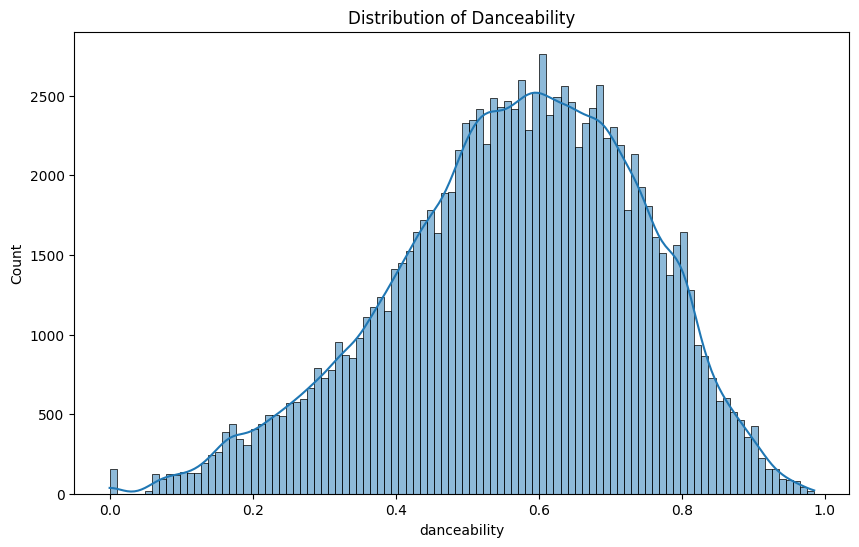

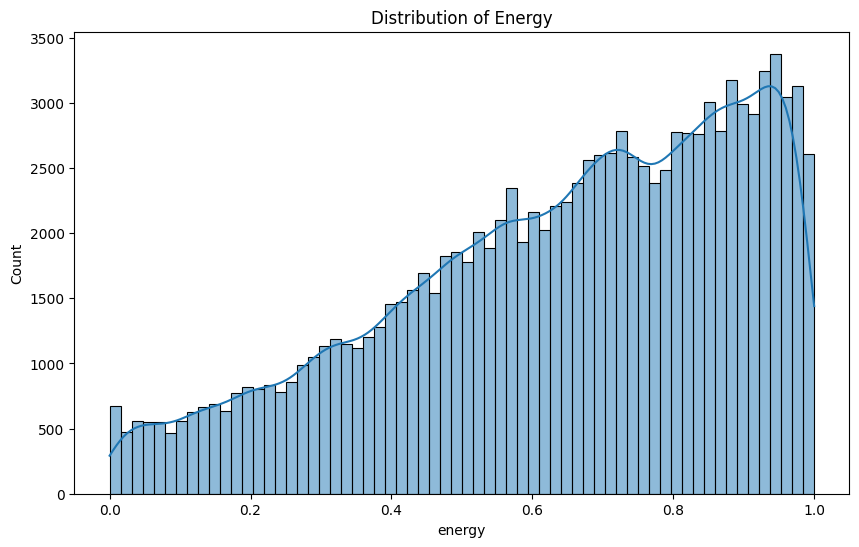

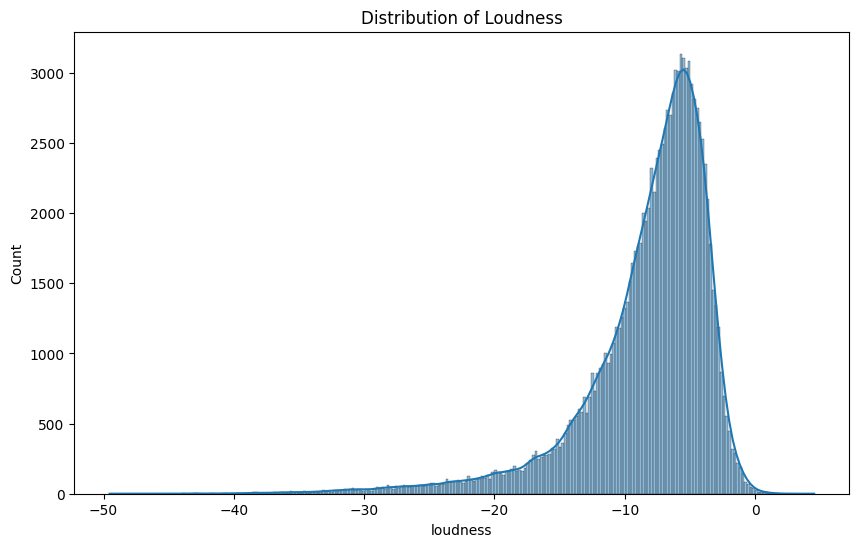

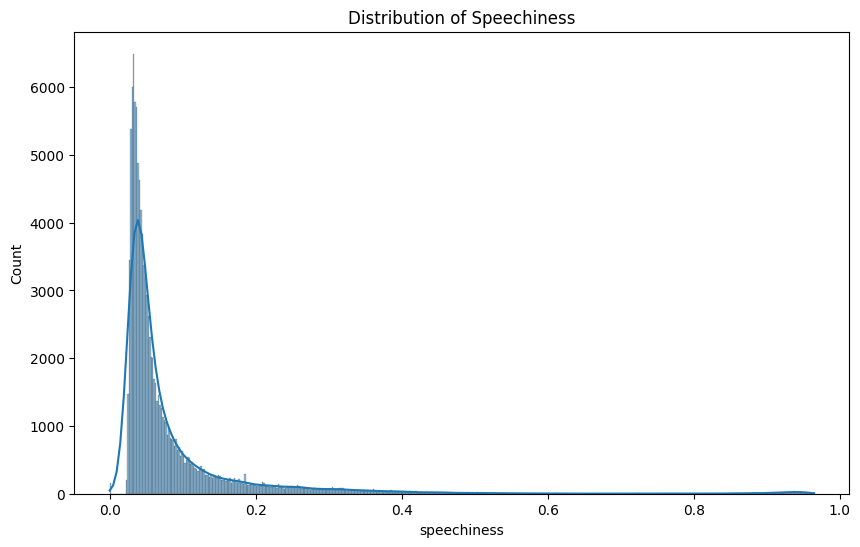

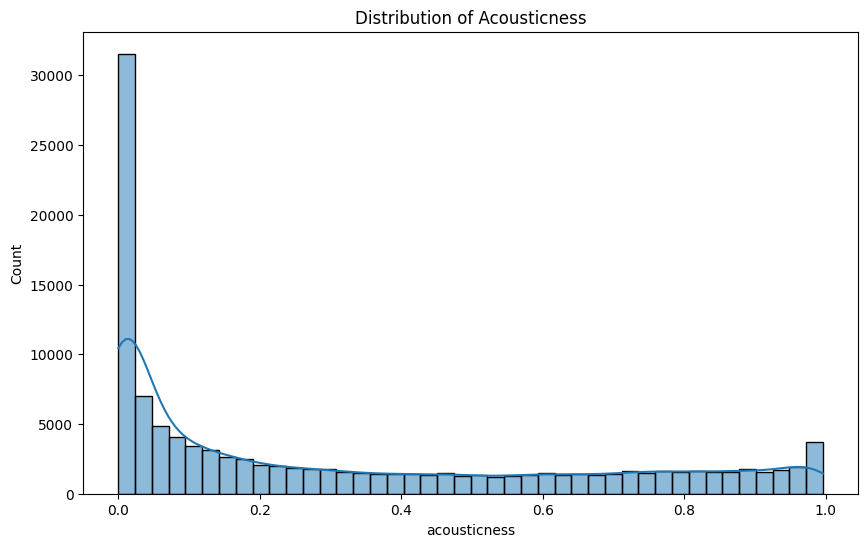

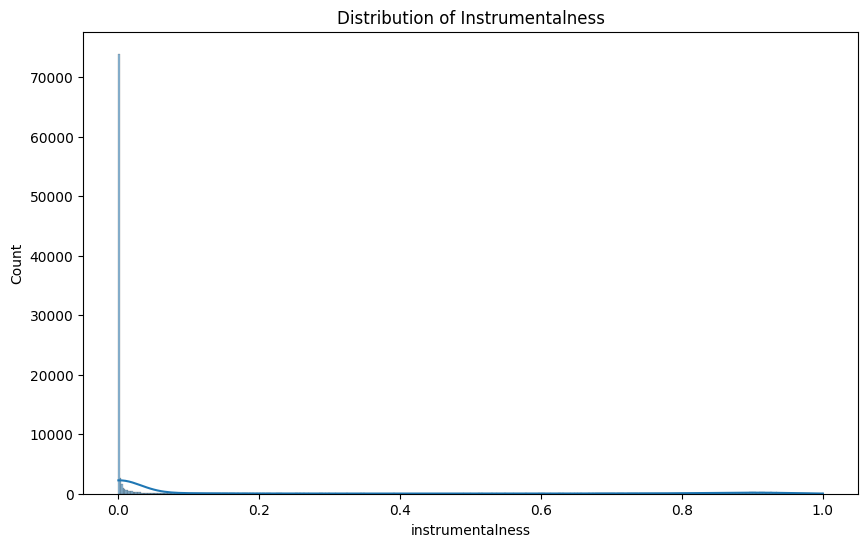

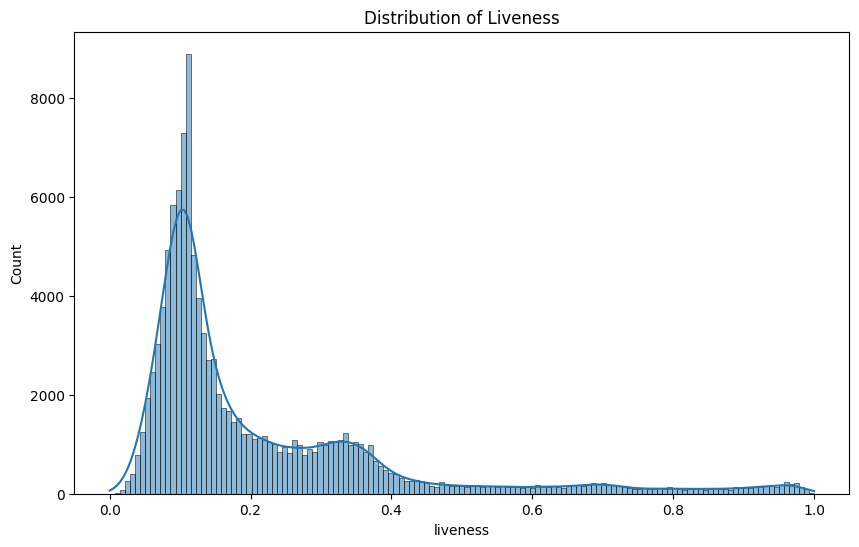

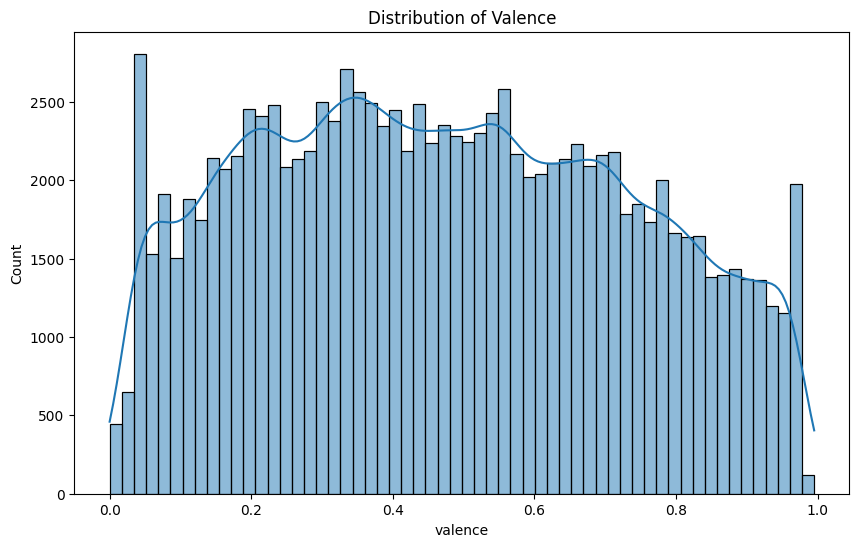

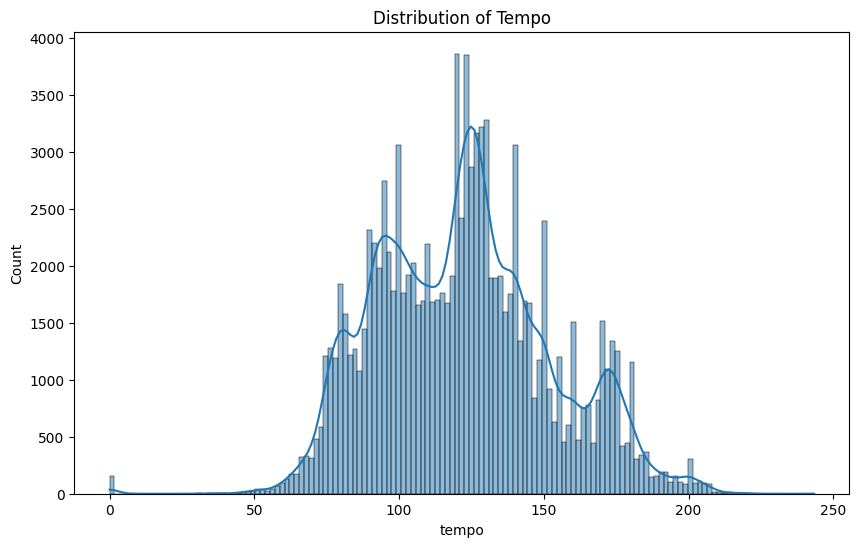

In [5]:
columns = [
    'popularity', 'duration_ms', 'danceability', 'energy',
    'loudness', 'speechiness', 'acousticness','instrumentalness',
    'liveness', 'valence', 'tempo'
    ]

for cols in columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[cols], kde=True)
    plt.title(f'Distribution of {cols.title()}')
    plt.show()

### Correlations

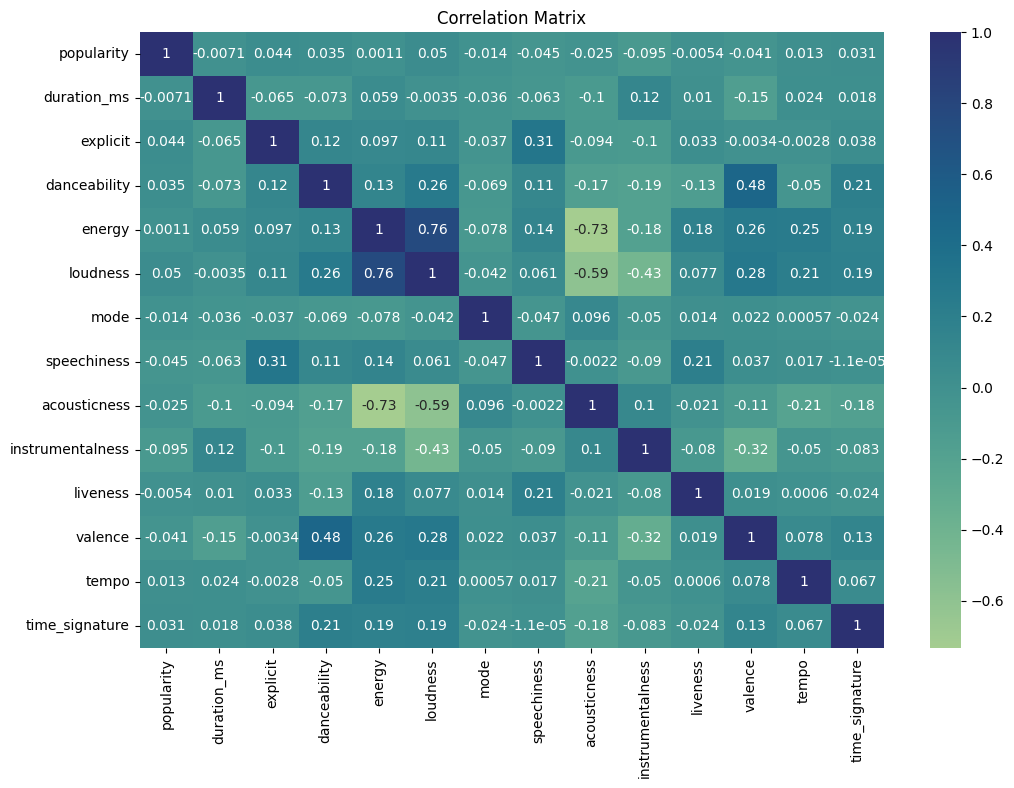

In [6]:
df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, cmap='crest')
plt.title("Correlation Matrix")
plt.show()

#### Implications:

- Energy and Loudness: Since energy and loudness are strongly correlated, loud tracks are likely to feel more energetic.
- Danceability and Valence: High danceability often correlates with positive emotions in music.
- Energy and Acousticness: Energetic tracks are generally not acoustic, indicating a preference for electronic or amplified instruments in high-energy music.
- Instrumentalness and Popularity: More popular tracks tend to have vocals, suggesting that vocal content might contribute to a track's popularity.

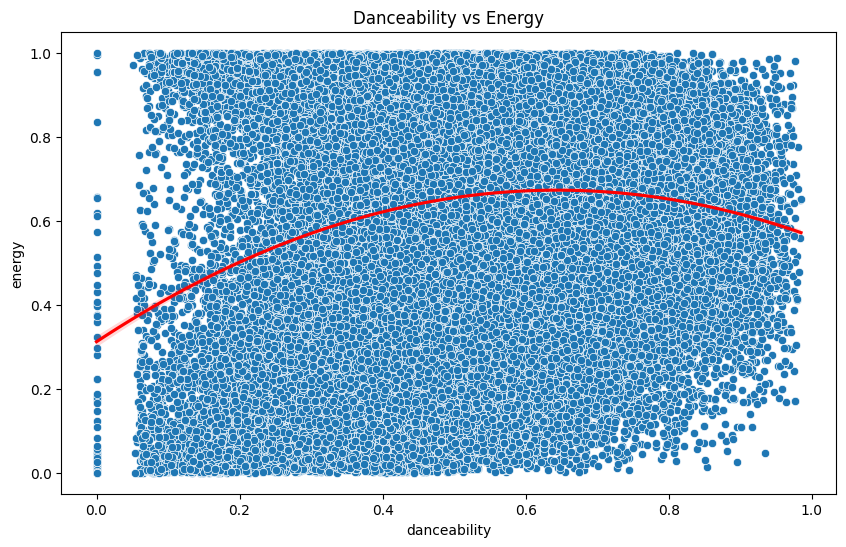

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= df['danceability'], y= df['energy'])
plt.title("Danceability vs Energy")

sns.regplot(x= df['danceability'], y= df['energy'],scatter=False, order=2, color='red')
plt.show()

#### Observations:

- Tracks with low danceability (close to 0.0) tend to have a wide range of energy values, from very low to very high.
- As danceability increases, energy tends to increase initially but then decreases slightly after reaching a peak.
- The quadratic trend (polynomial of order 2) suggests that there is a non-linear relationship between danceability and energy.
- It also suggests that the most danceable tracks are not always the most energetic.

Text(0.5, 1.0, 'Popularity vs Danceability')

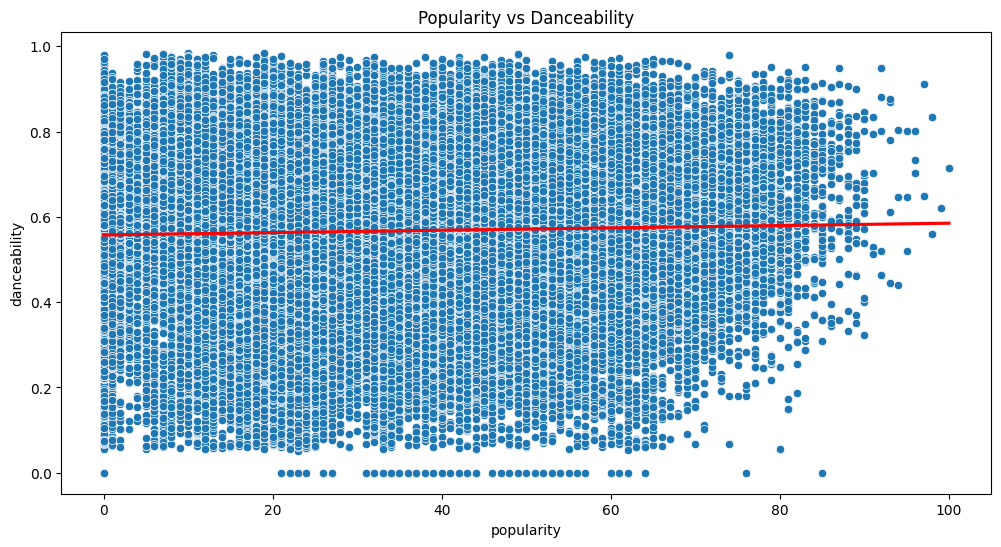

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x= df['popularity'], y= df['danceability'])
sns.regplot(y= df['danceability'], x= df['popularity'],scatter=False, color='red')
plt.title("Popularity vs Danceability")

#### Observation:

- The danceability is not very correlated with populality.
- As the danceability is very correlated with **energy** and **loudness**,<br>
we can see that the popular tracks tends to be more vocal. 

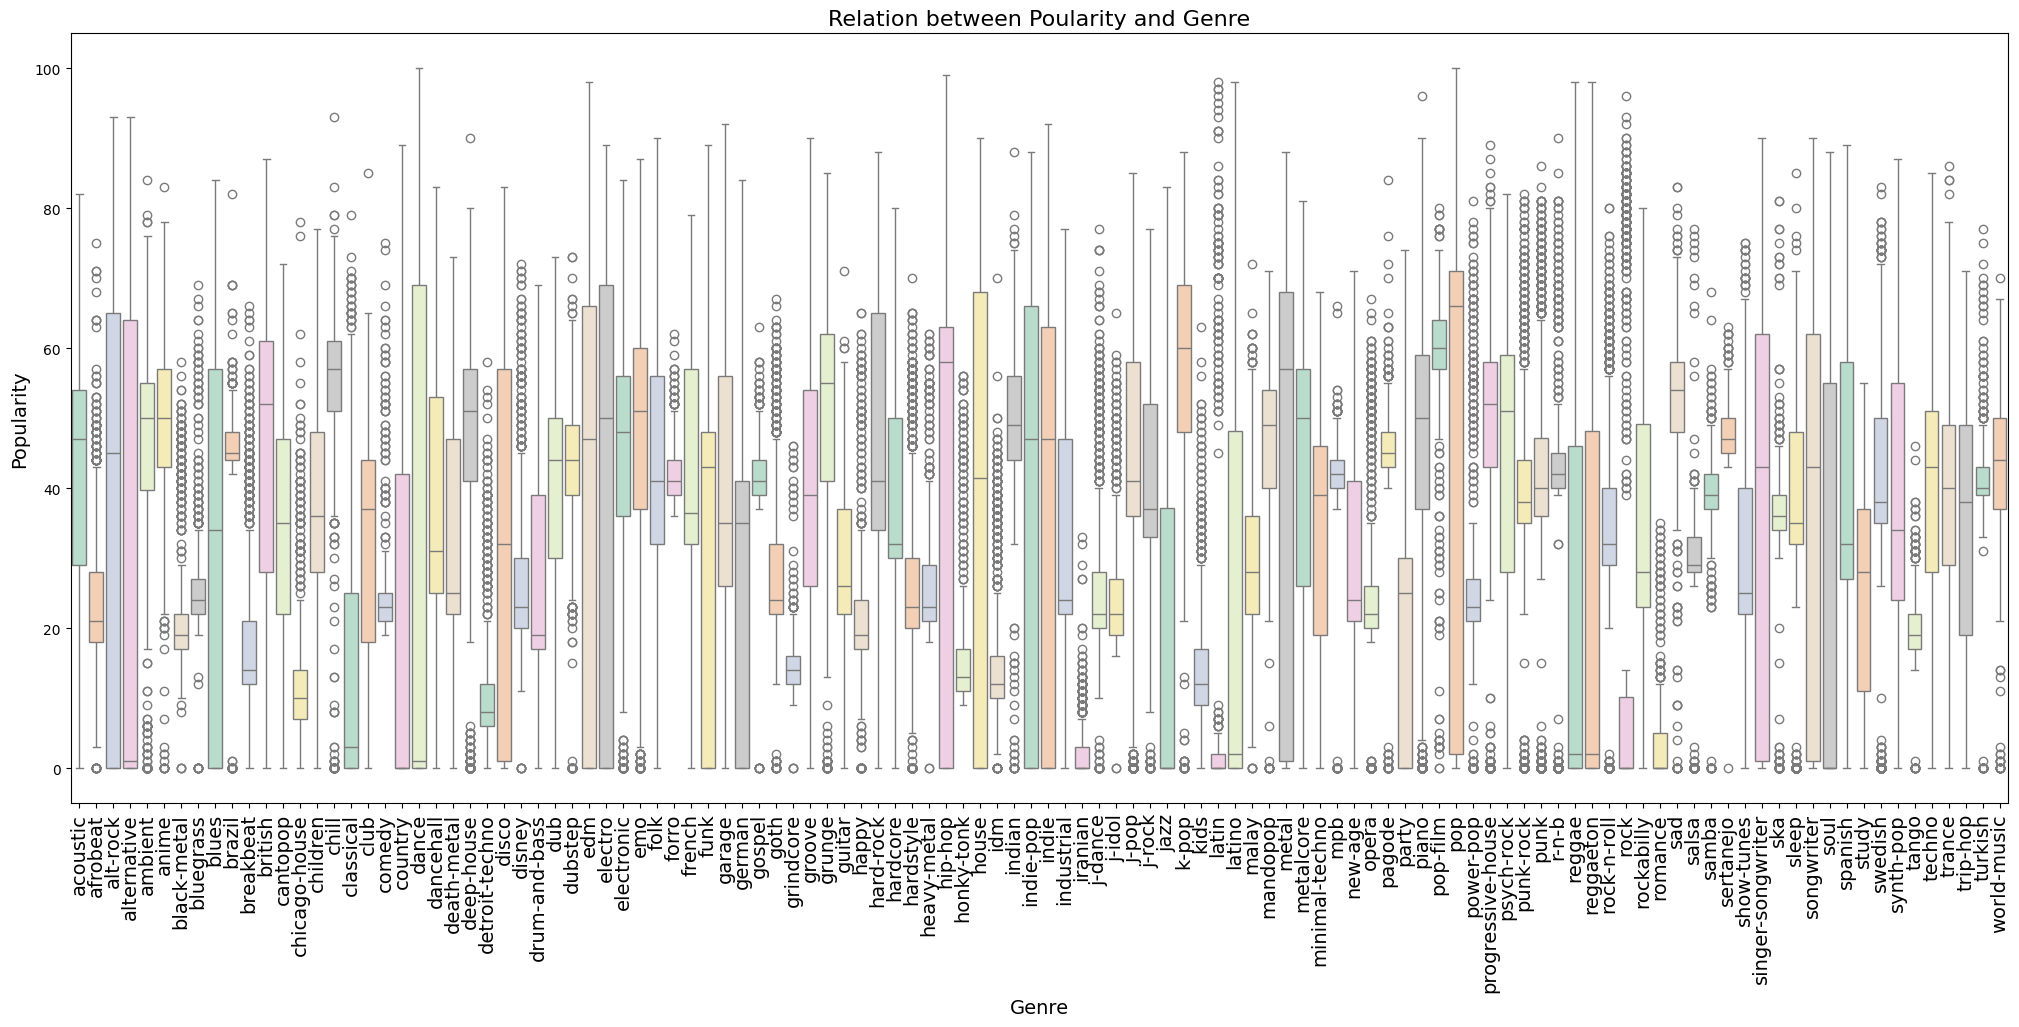

In [9]:
plt.figure(figsize=(25,10))
sns.boxplot(y=df['popularity'], x=df['track_genre'], palette='Pastel2')
plt.title("Relation between Poularity and Genre", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

### Most popular Spotfy tracks

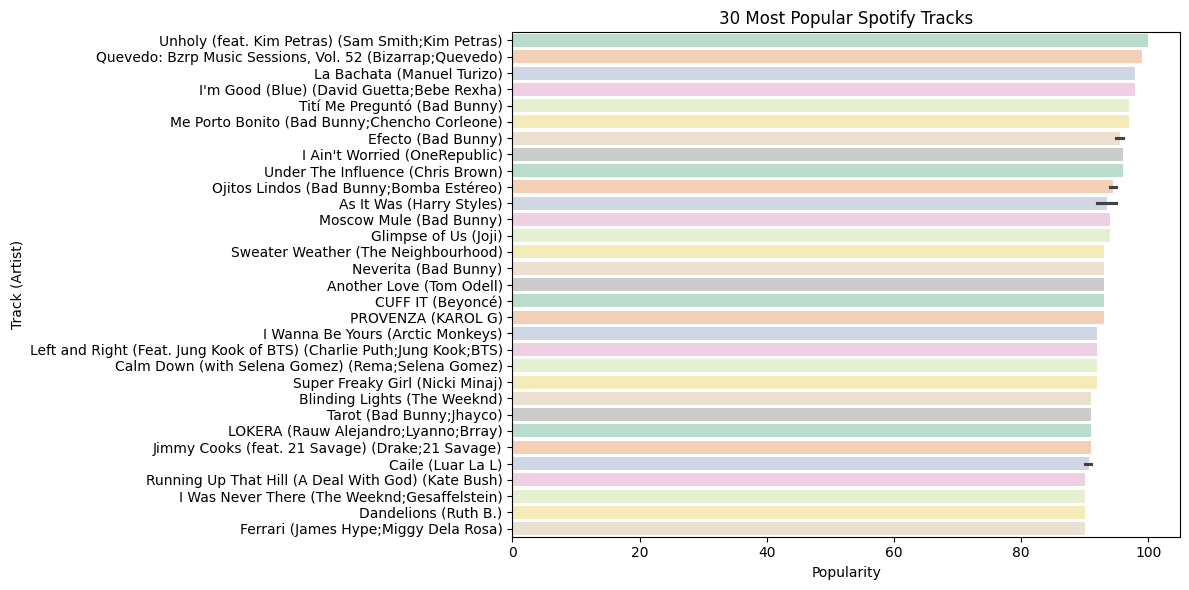

In [10]:
top_tracks = df.sort_values(by='popularity', ascending=False).head(75)

top_tracks['label'] = top_tracks.apply(lambda x: f"{x['track_name']} ({x['artists']})", axis=1)

plt.figure(figsize=(12,6))
sns.barplot(x='popularity', y='label', data=top_tracks, palette='Pastel2')
plt.title("30 Most Popular Spotify Tracks")
plt.xlabel("Popularity")
plt.ylabel("Track (Artist)")
plt.tight_layout()
plt.show()


### Most common listened genres

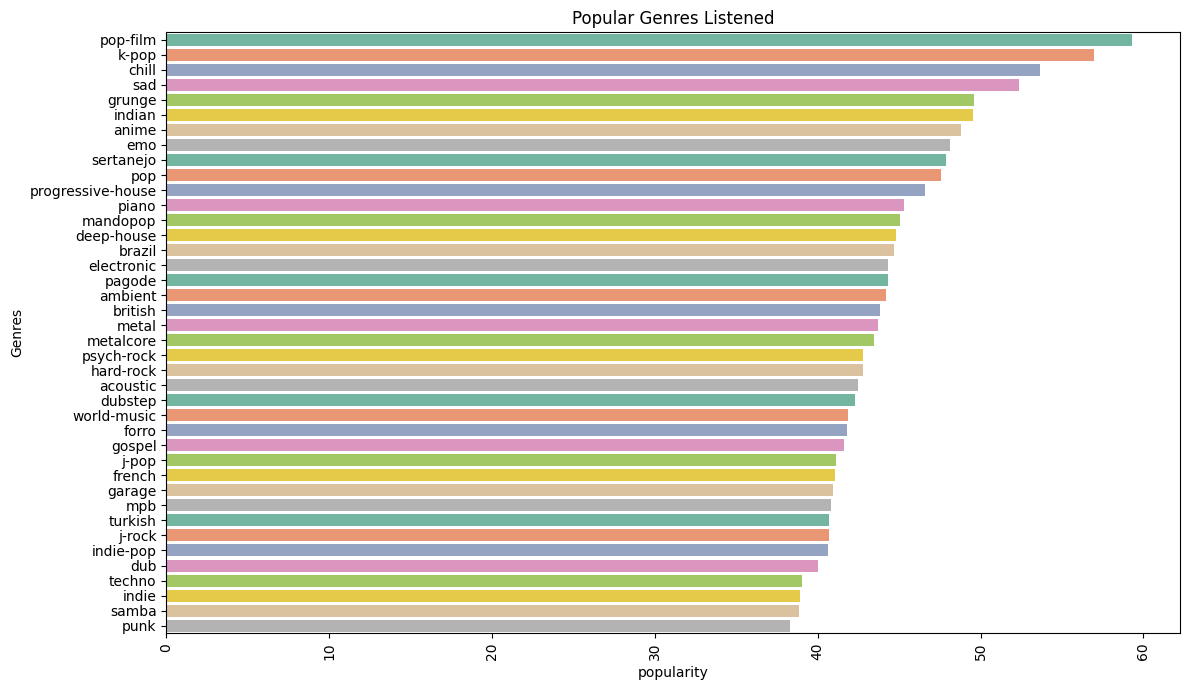

In [11]:
top_genre = df.groupby('track_genre')['popularity'].mean().nlargest(40).reset_index()

plt.figure(figsize=(12,7))
sns.barplot(y=top_genre['track_genre'], x=top_genre['popularity'], palette='Set2')
plt.title('Popular Genres Listened')
plt.ylabel('Genres')
plt.xticks(rotation=90)
plt.tight_layout()

### Machine Learning Recommendaton Model

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

x = df[features]

# Normalize
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

# Train model
knn = NearestNeighbors(n_neighbors=20, metric='cosine')
knn.fit(x_scaler)

# Define recommendation function
def recommend(track_name, n_recommendations=20):
    # Find the track index with the given track name
    track_index = df[df['track_name'] == track_name].index[0]
    # Use the model to find the neighbors
    distances, indices = knn.kneighbors([x_scaler[track_index]])

    recommendations = df.iloc[indices[0]].drop(track_index)
    recommendations_cleaned = recommendations.drop_duplicates(subset=['track_name', 'artists'])
    return recommendations_cleaned[['track_name','artists']].head(n_recommendations)

# Input the track name
track_name = 'Take Me Home, Country Roads' 

recommendations = recommend(track_name)
print('***********************************************************')
print(f"The Recommendaton for ({track_name}) is:")
print('***********************************************************')
print(recommendations)

***********************************************************
The Recommendaton for (Take Me Home, Country Roads) is:
***********************************************************
                                track_name                    artists
99100          Take Me Home, Country Roads                John Denver
92232                   Sealed With A Kiss               Brian Hyland
64953                         Feeling Good                Nina Simone
69351  Abhyasam Ariyatha Komali - Acoustic                       Fejo
63397          Sem Medo de Amar - Acústica                    Onze:20
90968                       Por Amarte Así            Sergio Esquivel
45625                         Caspi Corral           Carlos Di Fulvio
74291               Vai e Vem das Estações            Palavra Cantada
93602                         В парке Чаир            Аркадий Погодин
81037             Atak Gaya - Arijit Singh  Arijit Singh;Rupali Moghe
57                Sleepwalking in the Rain           C

### Conclusion

We got a lot of information in this simple exploratory analysis from Spotify. The correlations show us alot of informatoin about<br>what makes a music popular, or what kind of music we can choose based in the genre that we listen more.<br> We build as well a machine learning model to recommend us tracks that we like and want find more like that.
